### Fertilizers Use

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from joblib import dump, load


### Data Loading and Preprocessing

In [2]:
fertilizers_use = pd.read_csv("../Fertilizers use - FAOSTAT_data_en_2-27-2024.csv")
fertilizers_use.head()


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4021,NPK fertilizers,2002,2002,t,17900.0,I,Imputed value
1,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4021,NPK fertilizers,2003,2003,t,33200.0,I,Imputed value
2,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4021,NPK fertilizers,2004,2004,t,47700.0,I,Imputed value
3,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4001,Urea,2004,2004,t,42300.0,I,Imputed value
4,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4001,Urea,2005,2005,t,20577.0,I,Imputed value


In [3]:
# Checking for missing values
missing_values = fertilizers_use.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Domain Code         0
Domain              0
Area Code (M49)     0
Area                0
Element Code        0
Element             0
Item Code           0
Item                0
Year Code           0
Year                0
Unit                0
Value               0
Flag                0
Flag Description    0
dtype: int64


In [4]:
# Handling missing values if any
fertilizers_use_cleaned = fertilizers_use.dropna(axis=0).reset_index(drop=True)
fertilizers_use_cleaned

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4021,NPK fertilizers,2002,2002,t,17900.00,I,Imputed value
1,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4021,NPK fertilizers,2003,2003,t,33200.00,I,Imputed value
2,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4021,NPK fertilizers,2004,2004,t,47700.00,I,Imputed value
3,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4001,Urea,2004,2004,t,42300.00,I,Imputed value
4,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4001,Urea,2005,2005,t,20577.00,I,Imputed value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17802,RFB,Fertilizers by Product,716,Zimbabwe,5157,Agricultural Use,4006,Urea and ammonium nitrate solutions (UAN),2004,2004,t,5.00,I,Imputed value
17803,RFB,Fertilizers by Product,716,Zimbabwe,5157,Agricultural Use,4006,Urea and ammonium nitrate solutions (UAN),2008,2008,t,2.13,I,Imputed value
17804,RFB,Fertilizers by Product,716,Zimbabwe,5157,Agricultural Use,4006,Urea and ammonium nitrate solutions (UAN),2009,2009,t,9.00,I,Imputed value
17805,RFB,Fertilizers by Product,716,Zimbabwe,5157,Agricultural Use,4006,Urea and ammonium nitrate solutions (UAN),2010,2010,t,4971.00,I,Imputed value


In [5]:
# Handling missing values if any
fertilizers_use_cleaned = fertilizers_use.dropna(axis=1).reset_index(drop=True)
fertilizers_use_cleaned

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4021,NPK fertilizers,2002,2002,t,17900.00,I,Imputed value
1,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4021,NPK fertilizers,2003,2003,t,33200.00,I,Imputed value
2,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4021,NPK fertilizers,2004,2004,t,47700.00,I,Imputed value
3,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4001,Urea,2004,2004,t,42300.00,I,Imputed value
4,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4001,Urea,2005,2005,t,20577.00,I,Imputed value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17802,RFB,Fertilizers by Product,716,Zimbabwe,5157,Agricultural Use,4006,Urea and ammonium nitrate solutions (UAN),2004,2004,t,5.00,I,Imputed value
17803,RFB,Fertilizers by Product,716,Zimbabwe,5157,Agricultural Use,4006,Urea and ammonium nitrate solutions (UAN),2008,2008,t,2.13,I,Imputed value
17804,RFB,Fertilizers by Product,716,Zimbabwe,5157,Agricultural Use,4006,Urea and ammonium nitrate solutions (UAN),2009,2009,t,9.00,I,Imputed value
17805,RFB,Fertilizers by Product,716,Zimbabwe,5157,Agricultural Use,4006,Urea and ammonium nitrate solutions (UAN),2010,2010,t,4971.00,I,Imputed value


### Converting Categorial colunm to numbers

In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

label_encoders = {}

for col in fertilizers_use_cleaned.columns:
    if fertilizers_use_cleaned[col].dtype == 'object':
        fertilizers_use_cleaned[col] = label_encoder.fit_transform(fertilizers_use_cleaned[col])
        label_encoders[col] = label_encoder

from sklearn.preprocessing import MinMaxScaler

# Initialized MinMaxScaler
scaler = MinMaxScaler()

# Normalizing all columns
df_normalized = pd.DataFrame(scaler.fit_transform(fertilizers_use_cleaned), columns=fertilizers_use_cleaned.columns)


In [7]:
df_normalized.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,0.0,0.0,0.0,0.0,0.0,0.0,0.689655,0.318182,0.000000,0.000000,0.0,0.000186,1.0,0.5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.689655,0.318182,0.052632,0.052632,0.0,0.000345,1.0,0.5
2,0.0,0.0,0.0,0.0,0.0,0.0,0.689655,0.318182,0.105263,0.105263,0.0,0.000496,1.0,0.5
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.954545,0.105263,0.105263,0.0,0.000440,1.0,0.5
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.954545,0.157895,0.157895,0.0,0.000214,1.0,0.5


### Model Training and Evaluation

In [10]:

# Select relevant features
selected_features = ['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code', 'Element', 'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'Value', 'Flag', 'Flag Description']
fertilizers_use_selected = df_normalized[selected_features]


In [11]:
# Split the dataset into features (X) and target variable (y)
X = fertilizers_use_selected[['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code', 'Element', 'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'Flag', 'Flag Description']]
y = fertilizers_use_selected['Value']


In [12]:
X.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Flag,Flag Description
0,0.0,0.0,0.0,0.0,0.0,0.0,0.689655,0.318182,0.000000,0.000000,0.0,1.0,0.5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.689655,0.318182,0.052632,0.052632,0.0,1.0,0.5
2,0.0,0.0,0.0,0.0,0.0,0.0,0.689655,0.318182,0.105263,0.105263,0.0,1.0,0.5
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.954545,0.105263,0.105263,0.0,1.0,0.5
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.954545,0.157895,0.157895,0.0,1.0,0.5


In [13]:
# Split the dataset into training and testing sets (80%, 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### # Plot the relationship between each two variables to spot anything incorrect.

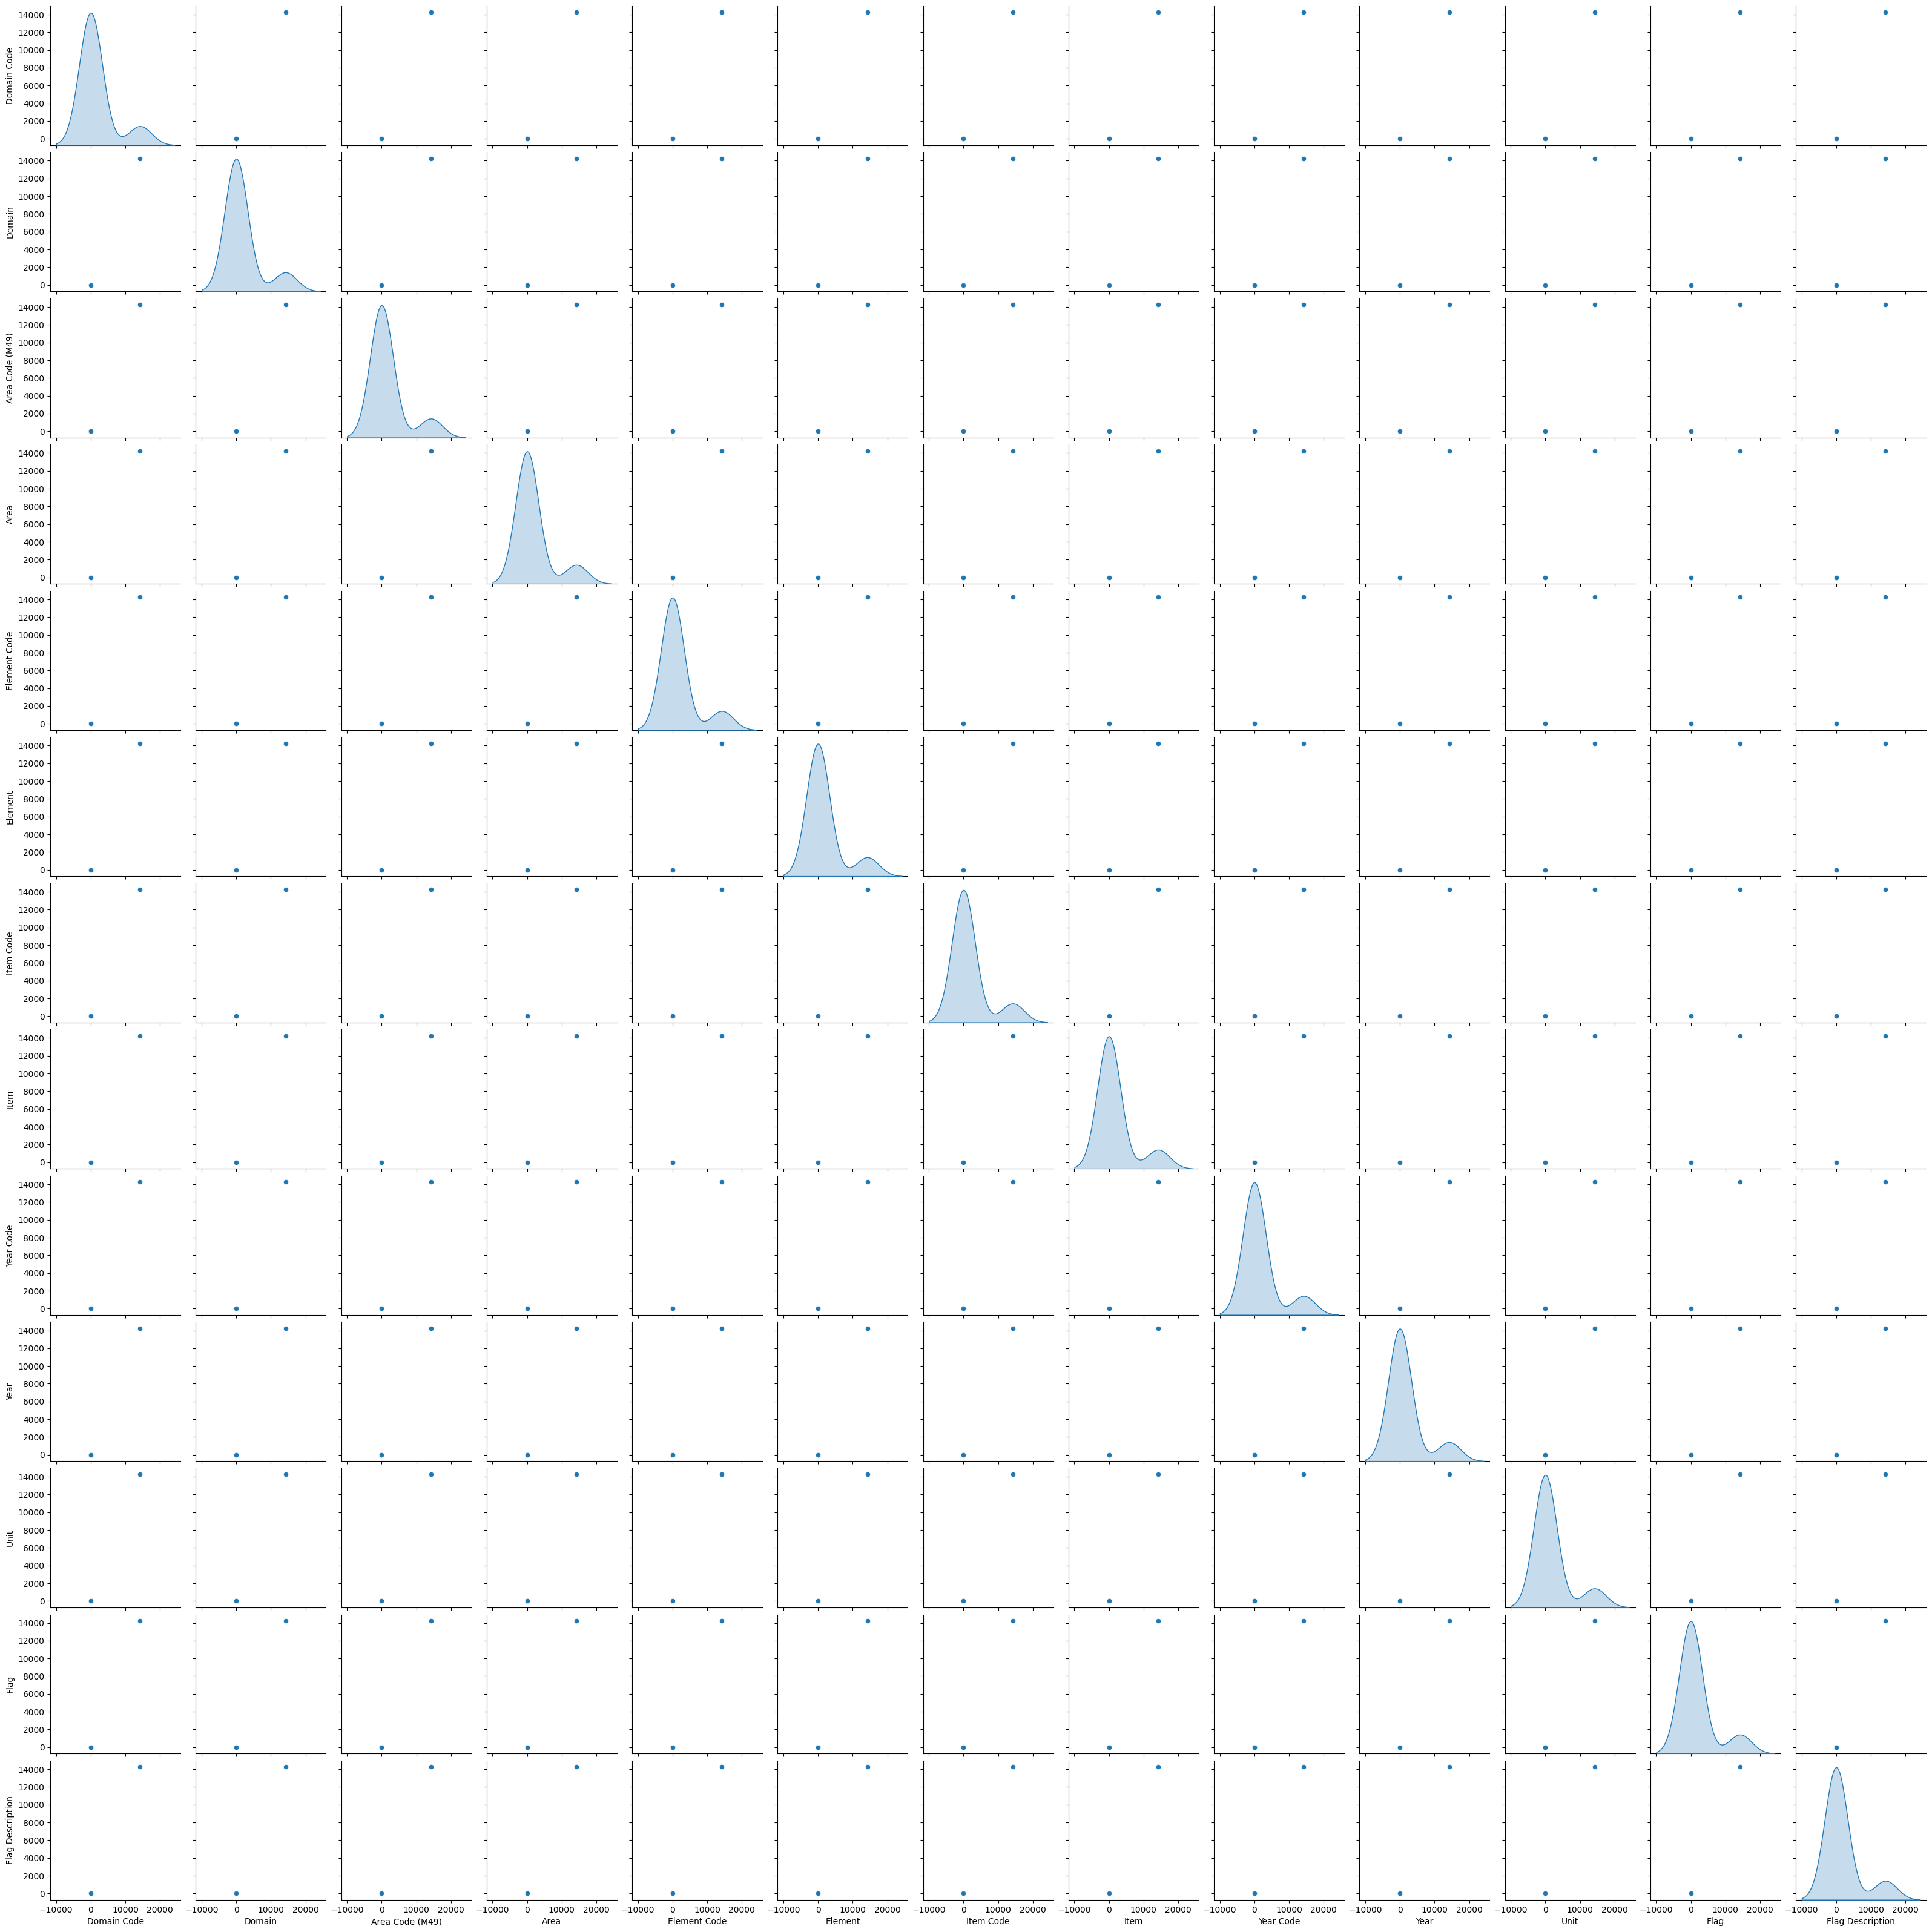

In [14]:
# Plot the relationship between each two variables to spot anything incorrect.
train_stats = X_train.describe()
sns.pairplot(train_stats[train_stats.columns], diag_kind="kde") # or diag_kind='reg'

In [15]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_predictions = lr_model.predict(X_test_scaled)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_mae = mean_absolute_error(y_test, lr_predictions)
print("Linear Regression Mean Squared Error:", lr_mse)
print("Linear Regression Mean Absolute Error:", lr_mae)

Linear Regression Mean Squared Error: 0.00021551251267393413
Linear Regression Mean Absolute Error: 0.003830552770376636


In [17]:
# MLP Regression Model
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)
mlp_model.fit(X_train_scaled, y_train)
mlp_predictions = mlp_model.predict(X_test_scaled)
mlp_mse = mean_squared_error(y_test, mlp_predictions)
mlp_mae = mean_absolute_error(y_test, mlp_predictions)
print("MLP Regression Mean Squared Error:", mlp_mse)
print("MLP Regression Mean Absolute Error:", mlp_mae)

MLP Regression Mean Squared Error: 0.0002583612922025168
MLP Regression Mean Absolute Error: 0.008175854961261652


### Model Evaluation Plots

<Figure size 1000x600 with 0 Axes>

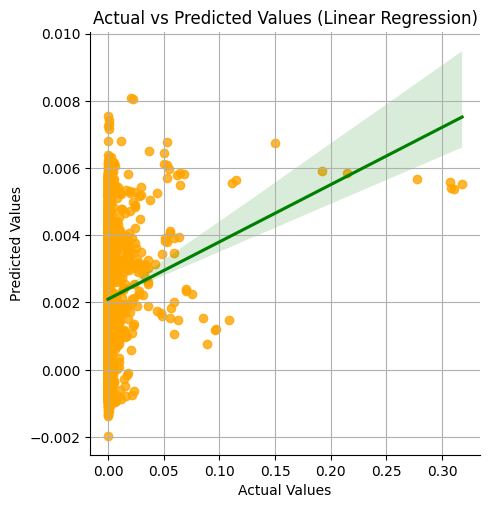

<Figure size 1000x600 with 0 Axes>

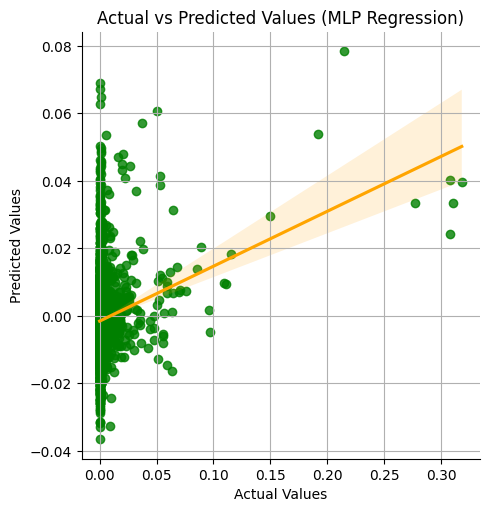

In [18]:

plot_data_lr = pd.DataFrame({'Actual': y_test, 'Predicted_LR': lr_predictions})
plot_data_mlp = pd.DataFrame({'Actual': y_test, 'Predicted_MLP': mlp_predictions})

# Plot actual vs predicted values for Linear Regression
plt.figure(figsize=(10, 6))
sns.lmplot(data=plot_data_lr, x='Actual', y='Predicted_LR', scatter_kws={'color': 'orange'}, line_kws={'color': 'green'})
plt.title('Actual vs Predicted Values (Linear Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# Plot actual vs predicted values for MLP Regression
plt.figure(figsize=(10, 6))
sns.lmplot(data=plot_data_mlp, x='Actual', y='Predicted_MLP', scatter_kws={'color': 'green'}, line_kws={'color': 'orange'})
plt.title('Actual vs Predicted Values (MLP Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()


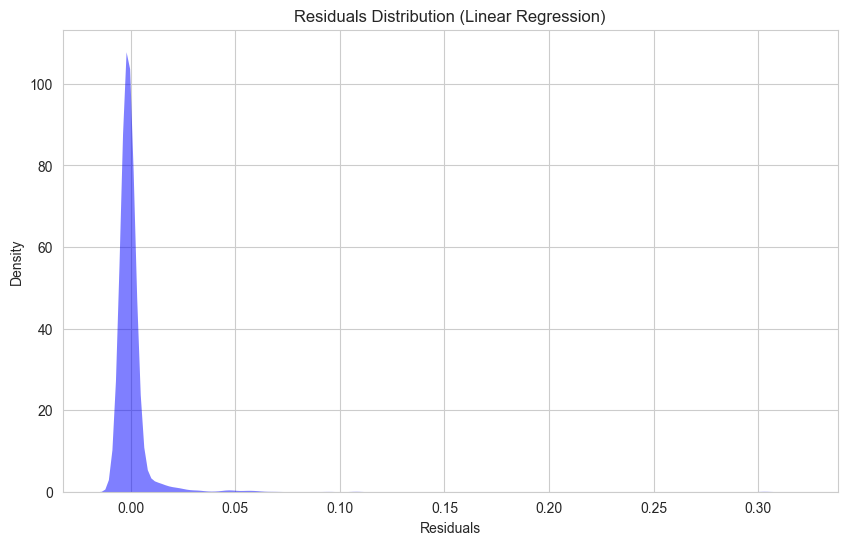

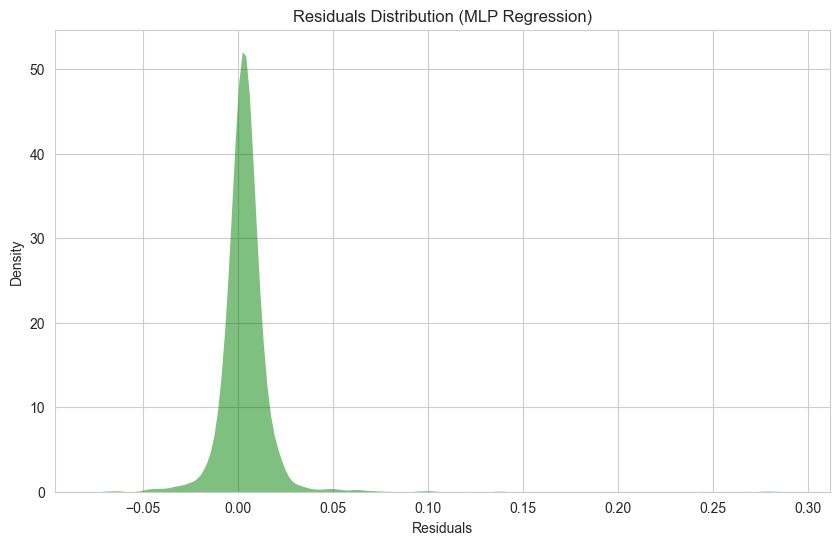

In [19]:
# Calculate residuals for Linear Regression
lr_residuals = y_test - lr_predictions

sns.set_style("whitegrid")

# Plot residuals for Linear Regression
plt.figure(figsize=(10, 6))
sns.kdeplot(lr_residuals, color='blue', fill=True, alpha=0.5, linewidth=0)
plt.title('Residuals Distribution (Linear Regression)')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

# Calculate residuals for MLP Regression
mlp_residuals = y_test - mlp_predictions

# Plot residuals for MLP Regression
plt.figure(figsize=(10, 6))
sns.kdeplot(mlp_residuals, color='green', fill=True, alpha=0.5, linewidth=0)
plt.title('Residuals Distribution (MLP Regression)')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

### Cross-Validation

Linear Regression Cross-Validation RMSE Scores: [0.01106577 0.01445887 0.01104977 0.00982446 0.02238066]
Linear Regression Mean RMSE: 0.013755905897291223
MLP Cross-Validation RMSE Scores: [0.011594   0.01467998 0.01142509 0.01034472 0.02237367]
MLP Mean RMSE: 0.01408349036642612


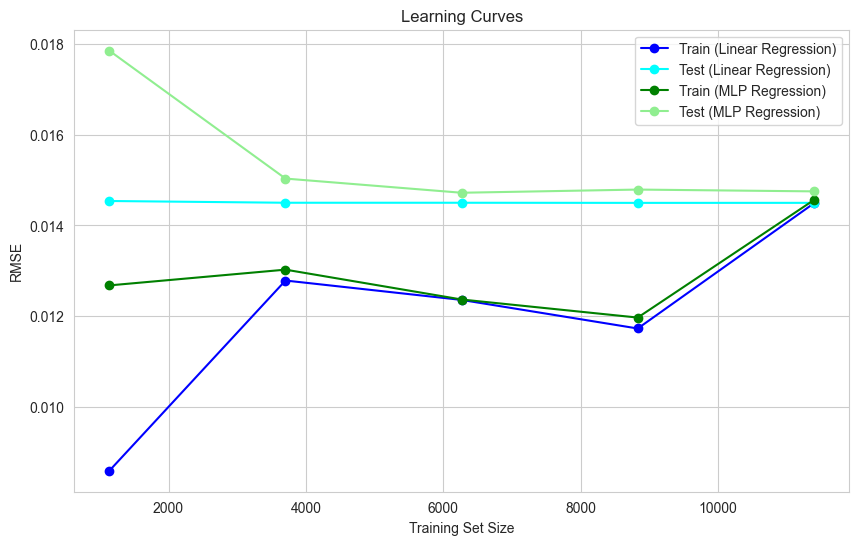

In [20]:
from sklearn.model_selection import cross_val_score, learning_curve

# Validate the models using cross-validation
lr_scores = cross_val_score(lr_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
lr_rmse_scores = np.sqrt(-lr_scores)
print("Linear Regression Cross-Validation RMSE Scores:", lr_rmse_scores)
print("Linear Regression Mean RMSE:", lr_rmse_scores.mean())

mlp_scores = cross_val_score(mlp_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
mlp_rmse_scores = np.sqrt(-mlp_scores)
print("MLP Cross-Validation RMSE Scores:", mlp_rmse_scores)
print("MLP Mean RMSE:", mlp_rmse_scores.mean())

# Plot learning curves
plt.figure(figsize=(10, 6))

# Learning curve for Linear Regression
train_sizes_lr, train_scores_lr, test_scores_lr = learning_curve(lr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
train_rmse_lr = np.sqrt(-train_scores_lr.mean(axis=1))
test_rmse_lr = np.sqrt(-test_scores_lr.mean(axis=1))
plt.plot(train_sizes_lr, train_rmse_lr, 'o-', color='blue', label='Train (Linear Regression)')
plt.plot(train_sizes_lr, test_rmse_lr, 'o-', color='cyan', label='Test (Linear Regression)')

# Learning curve for MLP Regression
train_sizes_mlp, train_scores_mlp, test_scores_mlp = learning_curve(mlp_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
train_rmse_mlp = np.sqrt(-train_scores_mlp.mean(axis=1))
test_rmse_mlp = np.sqrt(-test_scores_mlp.mean(axis=1))
plt.plot(train_sizes_mlp, train_rmse_mlp, 'o-', color='green', label='Train (MLP Regression)')
plt.plot(train_sizes_mlp, test_rmse_mlp, 'o-', color='lightgreen', label='Test (MLP Regression)')

plt.title('Learning Curves')
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()


In [21]:
df_normalized.drop(columns=['Area'], inplace=True)
df_normalized.head()

,Domain Code,Domain,Area Code (M49),Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,0.0,0.0,0.0,0.0,0.0,0.689655,0.318182,0.000000,0.000000,0.0,0.000186,1.0,0.5
1,0.0,0.0,0.0,0.0,0.0,0.689655,0.318182,0.052632,0.052632,0.0,0.000345,1.0,0.5
2,0.0,0.0,0.0,0.0,0.0,0.689655,0.318182,0.105263,0.105263,0.0,0.000496,1.0,0.5
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.954545,0.105263,0.105263,0.0,0.000440,1.0,0.5
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.954545,0.157895,0.157895,0.0,0.000214,1.0,0.5


In [22]:
df_normalized.drop(columns=['Year Code'], inplace=True)
df_normalized.head()

,Domain Code,Domain,Area Code (M49),Element Code,Element,Item Code,Item,Year,Unit,Value,Flag,Flag Description
0,0.0,0.0,0.0,0.0,0.0,0.689655,0.318182,0.000000,0.0,0.000186,1.0,0.5
1,0.0,0.0,0.0,0.0,0.0,0.689655,0.318182,0.052632,0.0,0.000345,1.0,0.5
2,0.0,0.0,0.0,0.0,0.0,0.689655,0.318182,0.105263,0.0,0.000496,1.0,0.5
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.954545,0.105263,0.0,0.000440,1.0,0.5
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.954545,0.157895,0.0,0.000214,1.0,0.5


### Concatenate `Area` , `Year Code` Categorical Variable into the normalized data 

In [23]:
area_column = fertilizers_use[['Area', 'Year Code']]

fertilizers_use_area_concat = pd.concat([df_normalized, area_column], axis=1)

fertilizers_use_area_concat.head()

,Domain Code,Domain,Area Code (M49),Element Code,Element,Item Code,Item,Year,Unit,Value,Flag,Flag Description,Area,Year Code
0,0.0,0.0,0.0,0.0,0.0,0.689655,0.318182,0.000000,0.0,0.000186,1.0,0.5,Afghanistan,2002
1,0.0,0.0,0.0,0.0,0.0,0.689655,0.318182,0.052632,0.0,0.000345,1.0,0.5,Afghanistan,2003
2,0.0,0.0,0.0,0.0,0.0,0.689655,0.318182,0.105263,0.0,0.000496,1.0,0.5,Afghanistan,2004
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.954545,0.105263,0.0,0.000440,1.0,0.5,Afghanistan,2004
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.954545,0.157895,0.0,0.000214,1.0,0.5,Afghanistan,2005


### Model Deployment

In [24]:
# Train a separate model for each geographical region and save them
regions = fertilizers_use_area_concat['Area'].unique()
for region in regions:
    region_data = fertilizers_use_area_concat[fertilizers_use_area_concat['Area'] == region]
    X_region = region_data[['Year']]
    y_region = region_data['Value']
    
    model = LinearRegression()
    model.fit(X_region, y_region)
    

    # Save the trained model
    model_file = f'../model_deployment/model_fertilizers_use/model_fertilizers_use_{region}.joblib'
    dump(model, model_file)
    print(f"Model for {region} saved as {model_file}")

Model for Afghanistan saved as ../model_deployment/model_fertilizers_use/model_fertilizers_use_Afghanistan.joblib
Model for Albania saved as ../model_deployment/model_fertilizers_use/model_fertilizers_use_Albania.joblib
Model for Algeria saved as ../model_deployment/model_fertilizers_use/model_fertilizers_use_Algeria.joblib
Model for Angola saved as ../model_deployment/model_fertilizers_use/model_fertilizers_use_Angola.joblib
Model for Antigua and Barbuda saved as ../model_deployment/model_fertilizers_use/model_fertilizers_use_Antigua and Barbuda.joblib
Model for Argentina saved as ../model_deployment/model_fertilizers_use/model_fertilizers_use_Argentina.joblib
Model for Armenia saved as ../model_deployment/model_fertilizers_use/model_fertilizers_use_Armenia.joblib
Model for Australia saved as ../model_deployment/model_fertilizers_use/model_fertilizers_use_Australia.joblib
Model for Austria saved as ../model_deployment/model_fertilizers_use/model_fertilizers_use_Austria.joblib
Model fo

Forecast for Afghanistan:
   Year  Forecasted_Value
0  2025         10.598124
1  2026         10.603358
2  2027         10.608592

Forecast for Albania:
   Year  Forecasted_Value
0  2025         -0.022496
1  2026         -0.022507
2  2027         -0.022519

Forecast for Algeria:
   Year  Forecasted_Value
0  2025          1.407369
1  2026          1.408064
2  2027          1.408759

Forecast for Angola:
   Year  Forecasted_Value
0  2025          0.372496
1  2026          0.372680
2  2027          0.372864

Forecast for Antigua and Barbuda:
   Year  Forecasted_Value
0  2025          0.000322
1  2026          0.000322
2  2027          0.000322

Forecast for Argentina:
   Year  Forecasted_Value
0  2025          2.232188
1  2026          2.233290
2  2027          2.234391

Forecast for Armenia:
   Year  Forecasted_Value
0  2025         -0.148039
1  2026         -0.148112
2  2027         -0.148185

Forecast for Australia:
   Year  Forecasted_Value
0  2025         -1.835528
1  2026         -1

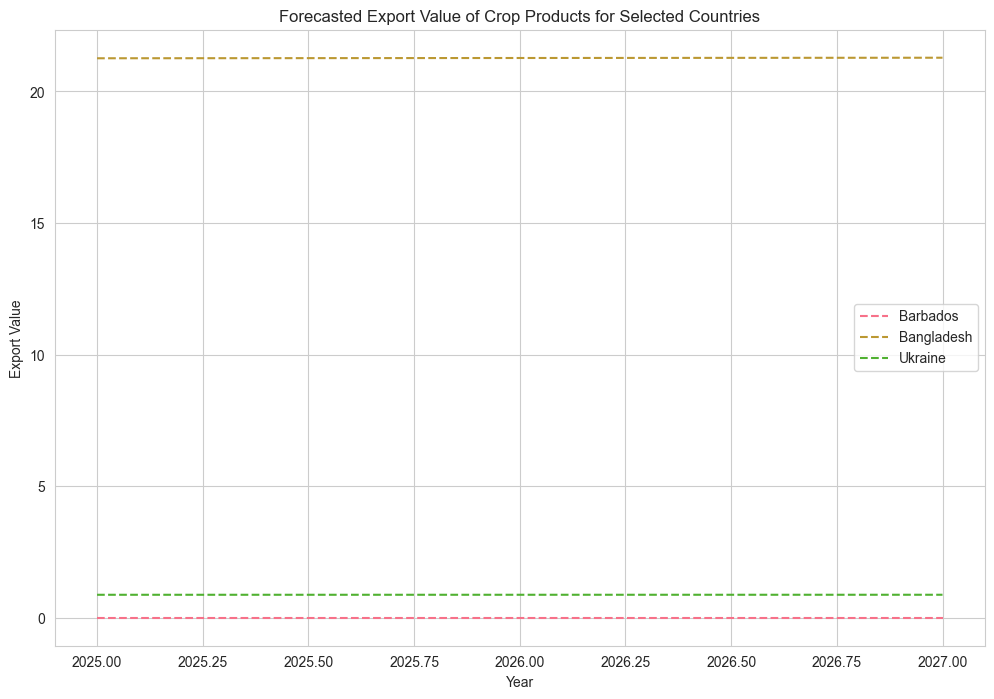

In [26]:
# Define a function to forecast the export value for a given region
def forecast_export_value(region, year):
    model = load(f'../model_deployment/model_fertilizers_use/model_fertilizers_use_{region}.joblib')
    forecast_years = [year + i for i in range(1, 4)]
    forecast_values = model.predict(pd.DataFrame({'Year': forecast_years}))
    forecast_df = pd.DataFrame({'Year': forecast_years, 'Forecasted_Value': forecast_values})
    return forecast_df

# Perform forecasting for each geographical region
regions = fertilizers_use_area_concat['Area'].unique()
forecast_results = {}   
for region in regions:
    forecast_results[region] = forecast_export_value(region, 2024)

# Display the forecast results for each region
for region, forecast_df in forecast_results.items():
    print(f"Forecast for {region}:")
    print(forecast_df)
    print()

sns.set_style("whitegrid")
sns.set_palette("husl")

plt.figure(figsize=(12, 8))
countries_to_plot = ['Barbados', 'Bangladesh', 'Ukraine']
for country in countries_to_plot:
    forecast_df = forecast_results[country]
    sns.lineplot(data=forecast_df, x='Year', y='Forecasted_Value', label=country, linestyle='--')

plt.title('Forecasted Export Value of Crop Products for Selected Countries')
plt.xlabel('Year')
plt.ylabel('Export Value')
plt.legend()
plt.grid(True)
plt.show()
